# **CS210 - TweetArt - COURSE PROJECT**
**Didem Iris Topbas 30654** 
## **Goal**

1 - The sentiment of my tweets is influenced by various factors such as personal achievements, various life events, and personal interactions. My hypothesis is that the beginning of holidays during the summer season is likely to lead to more positive and upbeat expressions in my tweets, so I expect that the highest sentiment month will be in the summer seasons compared to other seasons.

2 - My motivations for this project was to explore the sentiment of my tweets (which I post very frequently and with random emotions) throughout the seasons and analyze the seasons by exploring when I posted negative tweets the most or positive tweets the most, which would create a sense of overall average sentiment for my tweets. I was very curious for the result of this analysis and whether my hypothesis would be proved correct or not. I also wanted to delve into diverse set of techniques throughout the project such as using Natural Language Processing (NLP) and creative visualization of my twitter data.

1. **Importing Necessary Libraries**
2. **Collecting Data**
3. **Detecting Language**
4. **Performing Sentiment Analysis**
5. **Finding the Highest Sentiment and the Lowest Sentiment Month**ata.

## 1) Importing Necessary Libraries

In [1]:
import pandas as pd

# will be used for language detection, to consider the tweets written only in english (for accurate results)
from langdetect import detect

# will be used for sentiment analysis
from textblob import TextBlob 

from wordcloud import WordCloud
from collections import Counter
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 2) Collecting Data

In [2]:
# Loading data for winter
df_jan = pd.read_csv('./tweet_activity_metrics_didemirist_winter_january.csv')
df_feb = pd.read_csv('./tweet_activity_metrics_didemirist_winter_february.csv')
df_dec = pd.read_csv('./tweet_activity_metrics_didemirist_winter_december_updated.csv')

# Concatenate DataFrames
combined_df_winter = pd.concat([df_jan, df_feb, df_dec], ignore_index=True)

# Extracting necessary columns
selected_columns = ['Tweet id', 'Tweet text', 'time', 'impressions', 'likes']
df_selected_winter = combined_df_winter[selected_columns].copy()

# Drop rows with missing values
dataframe_winter = df_selected_winter.dropna()

In [3]:
# Loading data for spring
df_mar = pd.read_csv('./tweet_activity_metrics_didemirist_spring_mart.csv')
df_apr = pd.read_csv('./tweet_activity_metrics_didemirist_spring_april.csv')
df_may = pd.read_csv('./tweet_activity_metrics_didemirist_spring_may.csv')

# Concatenate DataFrames
combined_df_spring = pd.concat([df_mar, df_apr, df_may], ignore_index=True)

# Extracting necessary columns
selected_columns = ['Tweet id', 'Tweet text', 'time', 'impressions', 'likes']
df_selected_spring = combined_df_spring[selected_columns].copy()

# Drop rows with missing values
dataframe_spring = df_selected_spring.dropna()

In [4]:
# Loading data for summer
df_jun = pd.read_csv('./tweet_activity_metrics_didemirist_summer_june.csv')
df_jul = pd.read_csv('./tweet_activity_metrics_didemirist_summer_july.csv')
df_aug = pd.read_csv('./tweet_activity_metrics_didemirist_summer_august.csv')

# Concatenate DataFrames
combined_df_summer = pd.concat([df_jun, df_jul, df_aug], ignore_index=True)

# Extracting necessary columns
selected_columns = ['Tweet id', 'Tweet text', 'time', 'impressions', 'likes']
df_selected_summer = combined_df_summer[selected_columns].copy()

# Drop rows with missing values
dataframe_summer = df_selected_summer.dropna()

In [5]:
# Loading data for fall
df_sep = pd.read_csv('./tweet_activity_metrics_didemirist_fall_september.csv')
df_oct = pd.read_csv('./tweet_activity_metrics_didemirist_fall_october.csv')
df_nov = pd.read_csv('./tweet_activity_metrics_didemirist_fall_november.csv')


# Concatenate DataFrames
combined_df_fall = pd.concat([df_sep, df_oct, df_nov], ignore_index=True)

# Extracting necessary columns
selected_columns = ['Tweet id', 'Tweet text', 'time', 'impressions', 'likes']
df_selected_fall = combined_df_fall[selected_columns].copy()

# Drop rows with missing values
dataframe_fall = df_selected_fall.dropna()

In [6]:
dataframe_seasons = pd.concat([dataframe_winter, dataframe_spring, dataframe_summer, dataframe_fall], ignore_index=True)
dataframe_seasons

,Tweet id,Tweet text,time,impressions,likes
0,1620425497602830349,@hailburton hayır biz csçiyiz🤫,2023-01-31 14:15 +0000,128.0,4.0
1,1620113848685699073,@pelinbalcan1 yok yok toplu delirdik bence,2023-01-30 17:36 +0000,27.0,1.0
2,1619931943021457409,"but we were something, don’t u think so?🎶",2023-01-30 05:34 +0000,125.0,1.0
3,1619615386714132480,sigara içmek bencilliktir bencil birisi ile de...,2023-01-29 08:36 +0000,1990.0,5.0
4,1619614861503381505,@unknownobiwan 😖😖😖,2023-01-29 08:34 +0000,167.0,1.0
...,...,...,...,...,...
1238,1720558225261498463,birileriyle tanismadan once soyle bir testten ...,2023-11-03 21:47 +0000,275.0,8.0
1239,1720535537046503933,bu aralar ben📍 https://t.co/vO404AIxXi,2023-11-03 20:16 +0000,212.0,3.0
1240,1720159462453825751,"but do, mi, ti, why not me?",2023-11-02 19:22 +0000,162.0,1.0
1241,1720146093059571988,bir tane daha chandler friends editini kalbim ...,2023-11-02 18:29 +0000,230.0,5.0


## 3) Detecting Language


In [7]:
# Creating a new DataFrame containing only my English tweets:
from langdetect import detect

# Function to detect the language of a tweet
def detect_language(tweet):
    try:
        return detect(tweet)
    except:
        return 'unknown'
#_____________________Four seasons
# Apply language detection to 'Tweet text' column
dataframe_seasons['Language'] = dataframe_seasons['Tweet text'].apply(detect_language)

# Create a new DataFrame with only English tweets
dataframe_seasons = dataframe_seasons[dataframe_seasons['Language'] == 'en']
dataf_seasons = dataframe_seasons.drop(columns=['Language'])

#_____________________For Winter
# Apply language detection to 'Tweet text' column
dataframe_winter['Language'] = dataframe_winter['Tweet text'].apply(detect_language)

# Create a new DataFrame with only English tweets
dataframe_winter = dataframe_winter[dataframe_winter['Language'] == 'en']
dataf_winter = dataframe_winter.drop(columns=['Language'])

#_____________________For Spring
# Apply language detection to 'Tweet text' column
dataframe_spring['Language'] = dataframe_spring['Tweet text'].apply(detect_language)

# Create a new DataFrame with only English tweets
dataframe_spring = dataframe_spring[dataframe_spring['Language'] == 'en']
dataf_spring = dataframe_spring.drop(columns=['Language'])

#_____________________For Summer
# Apply language detection to 'Tweet text' column
dataframe_summer['Language'] = dataframe_summer['Tweet text'].apply(detect_language)

# Create a new DataFrame with only English tweets
dataframe_summer = dataframe_summer[dataframe_summer['Language'] == 'en']
dataf_summer = dataframe_summer.drop(columns=['Language'])

#_____________________For Fall
# Apply language detection to 'Tweet text' column
dataframe_fall['Language'] = dataframe_fall['Tweet text'].apply(detect_language)

# Create a new DataFrame with only English tweets
dataframe_fall = dataframe_fall[dataframe_fall['Language'] == 'en']
dataf_fall = dataframe_fall.drop(columns=['Language'])

## 4) Performing Sentiment Analysis

Select a season (winter, spring, fall, summer, four seasons):  four seasons
Please select a sentiment range (positive/negative/mixed):  mixed


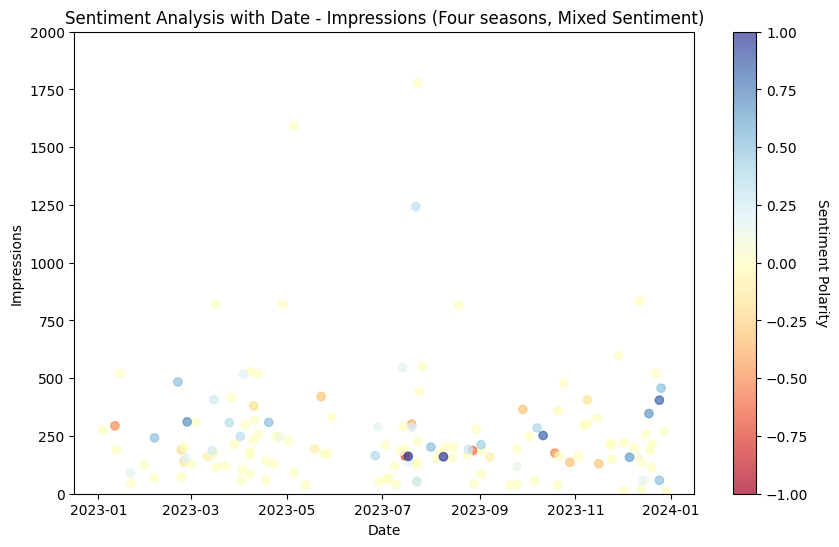

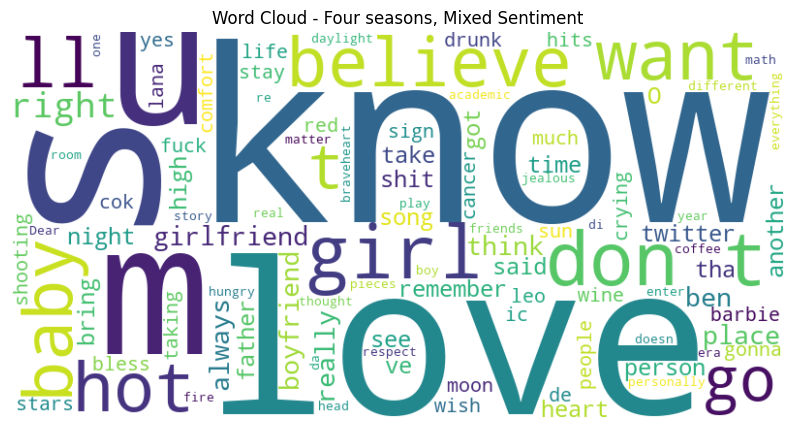

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import re

# Assuming dataf_seasons, dataf_winter, dataf_spring, dataf_summer, and dataf_fall are your DataFrames

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Add sentiment column to the DataFrames
dataf_seasons['sentiment'] = dataf_seasons['Tweet text'].apply(get_sentiment)
dataf_winter['sentiment'] = dataf_winter['Tweet text'].apply(get_sentiment)
dataf_spring['sentiment'] = dataf_spring['Tweet text'].apply(get_sentiment)
dataf_summer['sentiment'] = dataf_summer['Tweet text'].apply(get_sentiment)
dataf_fall['sentiment'] = dataf_fall['Tweet text'].apply(get_sentiment)

# Convert time to datetime
dataf_seasons['time'] = pd.to_datetime(dataf_seasons['time'])
dataf_winter['time'] = pd.to_datetime(dataf_winter['time'])
dataf_spring['time'] = pd.to_datetime(dataf_spring['time'])
dataf_summer['time'] = pd.to_datetime(dataf_summer['time'])
dataf_fall['time'] = pd.to_datetime(dataf_fall['time'])

# User Interaction
selected_season = input("Select a season (winter, spring, fall, summer, four seasons): ").lower()

# Select the appropriate DataFrame based on user input
if selected_season == 'winter':
    selected_data = dataf_winter
elif selected_season == 'spring':
    selected_data = dataf_spring
elif selected_season == 'summer':
    selected_data = dataf_summer
elif selected_season == 'fall':
    selected_data = dataf_fall
elif selected_season == 'four seasons':
    selected_data = dataf_seasons
else:
    print("Invalid season selection. Exiting.")
    exit()

sentiment_range = input("Please select a sentiment range (positive/negative/mixed): ").lower()

show_top5_tweets = ''

if sentiment_range != 'mixed':
    if sentiment_range == 'positive':
        show_top5_tweets = input("Do you want to show top 5 positive tweets? (yes/no): ").lower()
    elif sentiment_range == 'negative':
        show_top5_tweets = input("Do you want to show top 5 negative tweets? (yes/no): ").lower()
    else:
        print("A correct sentiment range is not chosen")
        
# Filter data based on user input
filtered_data = selected_data.copy()  # Create a copy of the DataFrame

if sentiment_range == 'positive':
    filtered_data = filtered_data[filtered_data['sentiment'] > 0.00]
elif sentiment_range == 'negative':
    filtered_data = filtered_data[filtered_data['sentiment'] < 0.00]
elif sentiment_range == 'mixed':
    # Include both positive and negative sentiments
    pass  # No need to modify the DataFrame for 'mixed' sentiment

# Preprocess text data to eliminate links and mentions
filtered_data['Tweet text'] = filtered_data['Tweet text'].apply(lambda x: re.sub(r'http\S+|@\S+|gt\S+', '', str(x)))

# Sort data based on sentiment
filtered_data = filtered_data.sort_values(by='sentiment', ascending=False if sentiment_range == 'positive' else True)

# Print top 5 tweets if required
if show_top5_tweets and sentiment_range != 'mixed':
    print("Top 5 Tweets:")
    for i, tweet in enumerate(filtered_data['Tweet text'].head(5)):
        print(f"{i + 1}. {tweet}")
    print()

# Plotting the graph
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with colors based on sentiment using 'RdYlBu' colormap
scatter = ax.scatter(filtered_data['time'], filtered_data['impressions'], c=filtered_data['sentiment'], cmap='RdYlBu', alpha=0.7, zorder=2, vmin=-1, vmax=1)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Sentiment Polarity', rotation=270, labelpad=15)

# Set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Impressions')
ax.set_title(f'Sentiment Analysis with Date - Impressions ({selected_season.capitalize()}, {sentiment_range.capitalize()} Sentiment)')

# Adjust y-axis limits
ax.set_ylim(0, 2000)  # Adjust the upper limit according to your data range

# Show the plot
plt.show()

# Additional Word Cloud
tweets_text = " ".join(filtered_data['Tweet text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words =100).generate(tweets_text)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud - {selected_season.capitalize()}, {sentiment_range.capitalize()} Sentiment')
plt.show()

## 5) Finding the Highest Sentiment and the Lowest Sentiment Month

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import calendar
from scipy.stats import ttest_ind
from termcolor import colored

# Assuming dataf_seasons, dataf_winter, dataf_spring, dataf_summer, and dataf_fall are your DataFrames

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Add sentiment column to the DataFrames
dataf_seasons['sentiment'] = dataf_seasons['Tweet text'].apply(get_sentiment)
dataf_winter['sentiment'] = dataf_winter['Tweet text'].apply(get_sentiment)
dataf_spring['sentiment'] = dataf_spring['Tweet text'].apply(get_sentiment)
dataf_summer['sentiment'] = dataf_summer['Tweet text'].apply(get_sentiment)
dataf_fall['sentiment'] = dataf_fall['Tweet text'].apply(get_sentiment)

# Convert time to datetime
dataf_seasons['time'] = pd.to_datetime(dataf_seasons['time'])
dataf_winter['time'] = pd.to_datetime(dataf_winter['time'])
dataf_spring['time'] = pd.to_datetime(dataf_spring['time'])
dataf_summer['time'] = pd.to_datetime(dataf_summer['time'])
dataf_fall['time'] = pd.to_datetime(dataf_fall['time'])

# Calculate the highest and lowest sentiment months
max_sentiment_month = calendar.month_name[dataf_seasons.groupby(dataf_seasons['time'].dt.month)['sentiment'].mean().idxmax()]
min_sentiment_month = calendar.month_name[dataf_seasons.groupby(dataf_seasons['time'].dt.month)['sentiment'].mean().idxmin()]

# Display the results
print(f"Highest Sentiment Month: {max_sentiment_month}")

print(f"Lowest Sentiment Month: {min_sentiment_month}")

# Find the most positive and most negative tweets
most_positive_tweet = dataf_seasons.loc[dataf_seasons['sentiment'].idxmax(), 'Tweet text']
most_negative_tweet = dataf_seasons.loc[dataf_seasons['sentiment'].idxmin(), 'Tweet text']

# Display the most positive and most negative tweets
print(colored("\nMost Positive Tweet:", 'green', attrs=['bold', 'blink']))
print(most_positive_tweet)

print(colored("\nMost Negative Tweet:", 'red', attrs=['bold', 'blink']))
print(most_negative_tweet)

# Add sentiment column to the DataFrame
dataf_seasons['sentiment'] = dataf_seasons['Tweet text'].apply(get_sentiment)

# Calculate average sentiment for all tweets
avg_sentiment = dataf_seasons['sentiment'].mean()

# Display average sentiment
print(f"\nAverage Total Sentiment: {avg_sentiment}")

# Find the most positive and most negative tweets
most_positive_tweet = dataf_seasons.loc[dataf_seasons['sentiment'].idxmax(), 'Tweet text']
most_negative_tweet = dataf_seasons.loc[dataf_seasons['sentiment'].idxmin(), 'Tweet text']

# Extract sentiment scores for summer months
summer_sentiments = dataf_summer['sentiment']

# Extract sentiment scores for non-summer months
non_summer_sentiments = dataf_seasons.loc[~dataf_seasons['time'].dt.month.isin([6, 7, 8]), 'sentiment']

# Perform t-test
t_stat, p_value = ttest_ind(summer_sentiments, non_summer_sentiments, equal_var=False)

# Display the t-test results
print("\nHypothesis Testing:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine whether to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("The hypothesis that the highest sentiment month is in the summer season is rejected.")
else:
    print("The hypothesis that the highest sentiment month is in the summer season is not rejected.")

Highest Sentiment Month: June
Lowest Sentiment Month: January

Most Positive Tweet:
constructions have started to build the best me ✨

Most Negative Tweet:
and I’m bad like the barbie

Average Total Sentiment: 0.060484153979051936

Hypothesis Testing:
T-statistic: 0.29799807361852393
P-value: 0.7668719966143014
The hypothesis that the highest sentiment month is in the summer season is not rejected.
